### Create a schedule

In [1]:
import sys
print('Kernel python: ',sys.executable)
import toast
import toast.scripts
import os
dir_scripts = os.path.dirname(toast.scripts.__file__)
print('Toast 3 installation: ',os.path.abspath(os.path.join(dir_scripts, '..')))

Kernel python:  /global/homes/s/susannaz/.conda/envs/bbflp/bin/python
Toast 3 installation:  /global/homes/s/susannaz/.conda/envs/bbflp/lib/python3.10/site-packages/toast


In [6]:
# Example: south patch

In [4]:
! $sys.executable {dir_scripts}/toast_ground_schedule.py @schedules/schedule_sat.par @schedules/patches_sat.txt --debug

TOAST INFO: Adding patch "south"
TOAST INFO: Rectangular format
/global/homes/s/susannaz/.conda/envs/bbflp/lib/python3.10/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.graticule(dpar=dpar, dmer=dmer, coord=coord, local=local, **kwds)
TOAST INFO: ('south',) corners:
 lon = [-50.0, -48.84529946162075, -47.69059892324149, -46.535898384862236, -45.38119784648298, -44.22649730810373, -43.07179676972447, -41.91709623134522, -40.76239569296597, -39.607695154586715, -38.452994616207455, -37.2982940778282, -36.14359353944895, -34.9888930010697, -33.83419246269044, -32.679491924311186, -31.52479138593193, -30.370090847552678, -29.215390309173422, -28.06068977079417, -26.905989232414914, -25.75128869403566, -24.596588155656406, -23.441887617277153, -22.287187078897897, -21.132486540518645, -19.97778600213939, -18.823085463760137, -17.66838492538088, -16.51368438700163, -15.358983848622373,

### Inspect what's inside the schedule

A 1 day observation schedule is created above. Alternatively, the latest version full SAT schedule can be imported from [pwg-tds/pipe-s0002/v6/schedules/schedule_sat.txt](https://github.com/simonsobs/pwg-scripts/blob/24a8c8202e2f80fb9b5097ee0e2dcfe5c1c07114/pwg-tds/pipe-s0002/v6/schedules/schedule_sat.txt), which has been saved and is analysed below.

In [7]:
schedule = 'schedules/schedule_sat_1day.txt'

In [8]:
from utils import *

In [9]:
analysis_result = analyze_schedule(schedule)

Total time: 0.42 days. Scheduled time: 0.42 days (100.00% efficiency), 1 scans
Compromised by Sun: 0.00 days (0.00%), 0 scans
Compromised by Moon: 0.00 days (0.00%), 0 scans
                                   south :   0.42 days (100.00%),    1 scans (100.00%) 100.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
Cumulative observing time by elevation
el < 56 deg: 100.000 %


### Split schedule

In [10]:
# Create single observations schedules:
split_schedule(schedule)

Found 30 entries in schedules/schedule_sat_1day.txt


In [11]:
# Print the last, as an example
! cat schedules/split_schedule/schedule_029.txt

#Site            Telescope        Latitude [deg] Longitude [deg]   Elevation [m]
 ATACAMA         SAT                     -22.958         -67.786          5200.0
#      Start time UTC        Stop time UTC Rotation Patch name                            Az min   Az max       El  Pass Sub
  2025-07-01 13:39:03  2025-07-01 13:59:00   270.00 south                                 138.10   147.71    55.00     0  29


### Create axis manager from schedule 

In [12]:
sched = np.genfromtxt(schedule,
                      skip_header=2, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                      dtype="U30,U30,U30,U30,f8,U30,f8,f8,f8,f8,f8,U8,i8,i8",
                      names=["UTC_st_day", "UTC_st_time", "UTC_en_day", "UTC_en_time", 
                             "rotation", "names", "az_mins", "az_maxs", 
                             "elevations", "pass","subpass"]) 

Start Time          End Time            dT   Az0    Az1   


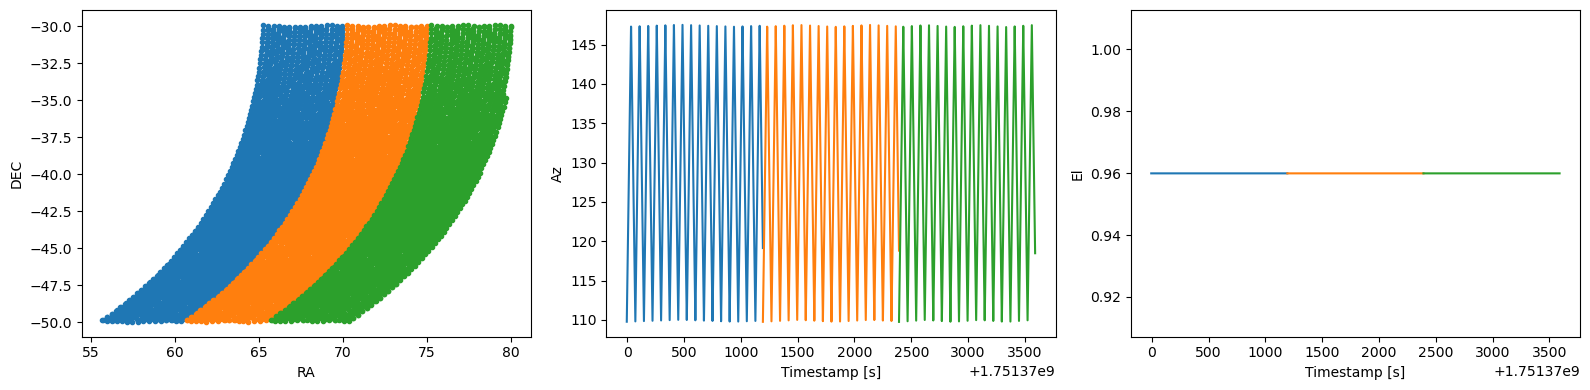

In [13]:
#Plot axis manager pointing info
DEG = np.pi/180
sch = sched[-1] #Pick the last observation
fig, axes = plt.subplots(1, 3, figsize = (16,4))
ax = axes.flatten()
print(f"{'Start Time'.ljust(19)} {'End Time'.ljust(19)} {'dT'.ljust(4)} {'Az0'.ljust(6)} {'Az1'.ljust(6)}")
for s in sched[2:5]:
    ra_cen, dec_cen, aman = make_aman(s, fig, ax, make_plot=True)

In [14]:
aman

AxisManager(signal[dets,samps], timestamps[samps], focal_plane*[dets], boresight*[samps], boresight_radec*[samps], dets:LabelAxis(1), samps:IndexAxis(2397))

In [13]:
#ONGOING: check projection

In [14]:
#ONGOING: translate schedule into hits map

#### Continue to the next section

Go to [Section 4 - TOD simulation](Sec4_Simulate_TOD_breakdown.ipynb).